# Lab03: Logistic Regression.

- Student ID: 21127099
- Student name: Nguyễn Tấn Lộc

**How to do your homework**


You will work directly on this notebook; the word `TODO` indicate the parts you need to do.

You can discuss ideas with classmates as well as finding information from the internet, book, etc...; but *this homework must be your*.

**How to submit your homework**

Before submitting, rerun the notebook (`Kernel` ->` Restart & Run All`).

Then create a folder named `ID` (for example, if your ID is 1234567, then name the folder `1234567`). Copy file notebook to this folder, compress and submit it on moodle.

**Contents:**
- Logistic Regression.

## 1. Feature Extraction

### Import Library

In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 

### Load data

In [22]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', return_X_y=True)

d:\Python\lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [23]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


### Extract Features

So we basically have 70000 samples with each sample having 784 features - pixels in this case and a label - the digit the image represent.

Let’s play around and see if we can extract any features from the pixels that can be more informative. First I’d like to know more about average intensity - that is the average value of a pixel in an image for the different digits

In [24]:
labels=np.unique(y)
# print(labels)
n_label=np.unique(y).shape[0]
l_means=np.zeros(shape=n_label,dtype=float) #array stores average intensity for each label

#TODO compute average intensity for each label
# for label in labels:
#     label_pixels = X[y == label]
#     label_mean_intensity = np.mean(label_pixels)
#     l_means[int(label)] = label_mean_intensity
for i in range(n_label):
    label_index = labels[i]
    label_data = X[y == label_index]
    mean_intensity = np.mean(label_data)
    l_means[i] = mean_intensity
print(l_means)

[44.17740512 19.40680177 38.03420776 36.15420938 30.99599983 32.95015873
 35.23486491 29.21798737 38.39790125 31.35940809]


Plot the average intensity using matplotlib

<BarContainer object of 10 artists>

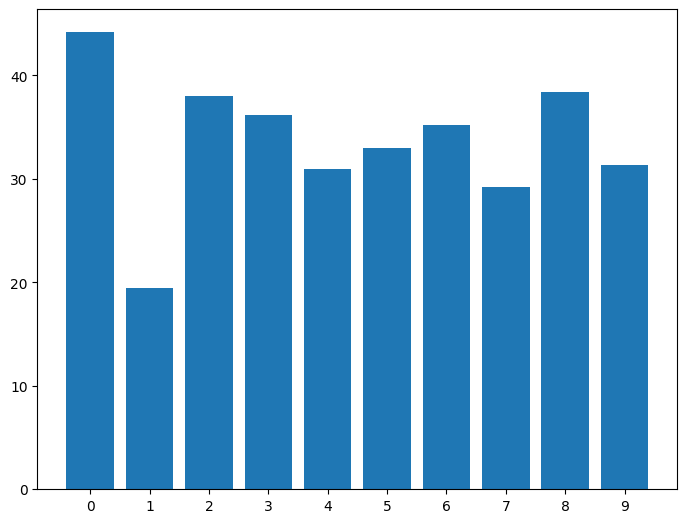

In [25]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(labels,l_means)

As we can see there are some differences in intensity. The digit “1” is the less intense while the digit “0” is the most intense. So this new feature seems to have some predictive value if you wanted to know if say your digit is a “1” or not.

In [26]:
#TODO compute average intensity for each data sample
# intensity=?
intensity = np.mean(X, axis=1)
print(intensity.shape)

(70000,)


Sometimes people really do not know what are they doing. I am not an exception:

In [27]:
X = np.array(X)

In [28]:
X_flip=np.flip(X)
symmetry= np.mean((X-X_flip),axis=1)
print(symmetry.shape)

(70000,)


I called this feature "symmetry" (though it's not "symmetry" at all). Use visualization method to understand why this feature work.

Our new trainning data will have 70000 samples and 2 features: intensity, symmetry.

In [29]:
#TODO create X_new by horizontal stack intensity and symmetry
X_new = np.column_stack((intensity, symmetry))
print(X_new.shape) #it should be (70000,2)

(70000, 2)


## 2. Training 

Usually logistic regression is a good first choice for classification. In this homework we use logistic regression for classifying digit 1 images and not digit 1 images.

### Normalize data
First normalize data using Z-score normalization
- **TODO: Study about Z-score normalization**
    - Z-score normalization, also known as standardization, is a statistical method used to transform data into a standard normal distribution with a mean of 0 and a standard deviation of 1. This normalization technique is particularly useful when the features in a dataset have different scales and units.
    - The formula for Z-score normalization for a given value $X$ in a dataset is:
    $$X_{normalized}=\frac{X-\mu}{\sigma}$$

    - Where:
        - $ X $ is the original value.
        - $ \mu $ is the mean of the dataset.
        - $ \sigma $ is the standard deviation of the dataset.
    - The process involves subtracting the mean $(\mu)$ from each value in the dataset and then dividing by the standard deviation $(\sigma)$. This centers the data around 0 and scales it based on the variability of the dataset.
- **TODO: Why should we normalize data?**
    - When working with data, normalizing information is a important step to achieve `balance and efficiency` in processing, analyzing, and applying Machine Learning (ML) algorithms. The Z-score normalization method is one of the popular techniques used to standardize data to the same scale and ensure that the data follows a **normal distribution**.

    - When data is not normalized, attributes often have different ranges or units, making comparisons or their utilization in algorithms challenging. By applying Z-score normalization, we can bring attribute values to the same range, creating a balance between them, which facilitates analysis and processing.

    - Besides, normalization helps minimize the influence of Noise and Outliers. These values can distort data and affect analysis. Z-score normalization addresses the variance caused by mean values on individual data points, reducing significant changes in these values.

    - Furthermore, standardizing data to a normal (Gaussian) distribution with a mean of 0 and a standard deviation of 1 enhances the efficiency of algorithms like linear regression and logistic regression. This aligns them with assumptions about data distribution, thereby improving their performance.

    - In summary, normalizing data using Z-score not only creates balance among attributes but also reduces Noise, mitigates the impact of Outliers, and enhances the performance of Machine Learning algorithms.

In [30]:
#TODO: normalize X_new
X_normalized = (X_new - np.mean(X_new)) / np.std(X_new)
print(X_normalized)

[[ 0.85342722 -1.6193639 ]
 [ 1.06445354 -0.50547592]
 [ 0.37569199 -1.35218211]
 ...
 [ 0.95427061 -0.19502487]
 [ 0.79632598 -1.04173105]
 [ 1.69918763  0.07215692]]


### Construct  data

In [31]:
X_new = np.hstack((np.ones((len(X_new), 1)), X_new)) #stack 1s column as usual
y_new=y.astype(int)
y_new=y_new.to_numpy()
y_new[y_new != 1] = 0 # digit 1 -> class 1, other digits -> class 0
y_new=y_new.reshape(-1,1)
print (X_new.shape)
print (y_new.shape)

(70000, 3)
(70000, 1)


### Split data 

In [32]:
train_X, test_X, train_y, test_y = train_test_split(X_new, y_new, test_size= int(1/3*X.shape[0]))
print(train_X.shape)
print(train_y.shape)

(46667, 3)
(46667, 1)


### Sigmoid function and derivative of the sigmoid function

In [33]:
def sigmoid_activation(x):
    """compute the sigmoid activation value for a given input"""
    return 1.0 / (1 + np.exp(-x))
def sigmoid_deriv(x):
    '''compute the derivative of the sigmoid function ASSUMING
    that the input ‘x‘ has already been passed through the sigmoid
    activation function'''
    return x * (1 - x)

### Compute output

In [34]:
def compute_h(W, X):
    """
    Compute output: Take the dot product between our features ‘X‘ and the weight
    matrix ‘W‘, then pass this value through our sigmoid activation function 
    """
    return sigmoid_activation(X.dot(W))
def predict(W, X):
 
    '''Take the dot product between our features and weight matrix, 
       then pass this value through our sigmoid activation'''
    #........
    preds=sigmoid_activation(X.dot(W))
    # apply a step function to threshold the outputs to binary
    # class labels
    preds[preds <= 0.5] = 0
    preds[preds > 0] = 1

    return preds

### Compute gradient

**Loss Function: Average negative log likelihood**
$$\mathcal{L}=\dfrac{1}{N} \sum_{i=1}^{N} -\left(y^{i}\ln h_{\mathbf{w}}\left(\mathbf{x}^{i}\right)+\left(1-y^{i}\right)\ln \left(1-h_{\mathbf{w}}\left(x^{i}\right)\right)\right) $$


$$\text{Sigmoid Activation: } z= \sigma \left(h\right)= \dfrac{1}{1+e^{-h}}$$

$$\text{Cross-entropy: } J(w)=-\left({ylog(z)+(1-y)log(1-z)}\right)$$

$$\text{Chain rule: } \dfrac{\partial J(w)}{\partial w}=\dfrac{\partial J(w)}{\partial z} \dfrac{\partial z}{\partial h}\dfrac{\partial h}{\partial w}  $$

$$\dfrac{\partial J(w)}{\partial z}=-\left(\dfrac{y}{z}-\dfrac{1-y}{1-z}\right)=\dfrac{z-y}{z(1-z)}$$

$$\dfrac{\partial z}{\partial h}=z(1-z)$$

$$\dfrac{\partial h}{\partial w}=X$$

$$\dfrac{\partial J(w)}{\partial w}=X^T(z-y)$$

In [35]:
def compute_gradient(train_X, error):
    """
    This is the gradient descent update of "average negative loglikelihood" loss function. 
    In lab02 our loss function is "sum squared error".
    """
    #TODO
    gradient = np.dot(train_X.T, error)
    gradient/=len(train_X)
    return gradient

In [36]:
EPSILON = 1e-10

In [37]:
def train(W,train_X, train_y, learning_rate, num_epochs, losses):
    for epoch in np.arange(0, num_epochs):
        h=compute_h(W,train_X)
        error = h - train_y
        # If EPSILON isn't used, the code may trigger RuntimeWarning for division by zero in logarithmic operations and for encountering invalid values during multiplication. 
        loss = np.mean(- train_y * np.log(h + EPSILON) - (1 - train_y) * np.log(1 - h + EPSILON))
        losses.append(loss)
        gradient=compute_gradient(train_X, error)
        W += -learning_rate * gradient
        if ((epoch+1)%1000==0): print ('Epoch %d, loss %.3f' %(epoch+1, loss))
        
    return W

### Train our model

In [38]:
W = np.random.randn(train_X.shape[1], 1)
losses=[]
num_epochs=40000
learning_rate=0.01
W=train(W,train_X, train_y, learning_rate, num_epochs , losses)
x_preds=predict(W ,train_X)
train_err = np.mean(x_preds != train_y) * 100
print ('=' * 50)
print ('Train err of final w: ', train_err)

Epoch 1000, loss 0.294
Epoch 2000, loss 0.287
Epoch 3000, loss 0.282
Epoch 4000, loss 0.276
Epoch 5000, loss 0.271
Epoch 6000, loss 0.266
Epoch 7000, loss 0.262
Epoch 8000, loss 0.258
Epoch 9000, loss 0.254
Epoch 10000, loss 0.250
Epoch 11000, loss 0.247
Epoch 12000, loss 0.244
Epoch 13000, loss 0.241
Epoch 14000, loss 0.238
Epoch 15000, loss 0.236
Epoch 16000, loss 0.234
Epoch 17000, loss 0.231
Epoch 18000, loss 0.229
Epoch 19000, loss 0.228
Epoch 20000, loss 0.226
Epoch 21000, loss 0.224
Epoch 22000, loss 0.223
Epoch 23000, loss 0.221
Epoch 24000, loss 0.220
Epoch 25000, loss 0.219
Epoch 26000, loss 0.218
Epoch 27000, loss 0.216
Epoch 28000, loss 0.215
Epoch 29000, loss 0.215
Epoch 30000, loss 0.214
Epoch 31000, loss 0.213
Epoch 32000, loss 0.212
Epoch 33000, loss 0.211
Epoch 34000, loss 0.211
Epoch 35000, loss 0.210
Epoch 36000, loss 0.209
Epoch 37000, loss 0.209
Epoch 38000, loss 0.208
Epoch 39000, loss 0.208
Epoch 40000, loss 0.207
Train err of final w:  8.58208155656031


## 3. Evaluate our model

In [39]:
preds = predict(W, train_X)
print(classification_report(train_y, preds))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     41445
           1       0.77      0.33      0.46      5222

    accuracy                           0.91     46667
   macro avg       0.85      0.66      0.71     46667
weighted avg       0.90      0.91      0.90     46667



In [40]:
preds = predict(W, test_X)
print(classification_report(test_y, preds))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     20678
           1       0.78      0.33      0.46      2655

    accuracy                           0.91     23333
   macro avg       0.85      0.66      0.71     23333
weighted avg       0.90      0.91      0.90     23333



**TODO: Comment on the result**

Both the `Training and Test set` accuracy scores stand high, approximately 0.92, suggesting that the Logistic Regression model applied to this dataset might not suffer from ***Overfitting*** or ***Underfitting***. This signifies the model's efficient performance, indicating its capability to predict accurately on new data.

However, the model displays a notable precision and accuracy imbalance coupled with low recall, particularly evident in its handling of the Negative (class 0) and Positive (class 1) instances. The model excels in predicting Negative cases accurately but struggles with a considerable number of False Negatives for Positive cases, leading to a compromised Recall score.

Looking at precision and recall more closely:

    - For Negative class (0), both precision and recall are high, indicating the model's proficiency in identifying these instances.
    - Conversely, for the Positive class (1), precision stands at around 75%, while recall is lower, approximately 37%, suggesting the model's tendency to miss certain Positive instances.
The F1-scores provide a balanced view, demonstrating a reasonable weighted average for both classes, considering the trade-off between precision and recall.

While the overall accuracy is around 91% on the test set, it might be heavily influenced by the larger class (class 0). The macro and weighted averages present a balanced performance overview, but the lower recall for class 1 contributes to a reduced macro-average.

Improving the model's performance could involve:

    - Addressing class imbalance using techniques like oversampling the minority class or adjusting class weights.
    - Exploring hyperparameter tuning to optimize the model's behavior, experimenting with different logistic regression parameters.
    - Considering more advanced techniques such as ensemble methods or alternative classification algorithms, especially if the dataset complexity demands it.
In summary, while the model demonstrates good performance for the majority class, enhancing its ability to capture instances of the minority class is crucial. Further exploration, tuning, and potentially exploring alternative methodologies could significantly improve the model's overall performance.